In [63]:
import os

import cv2
import numpy as np
from pathlib import Path
from tensorflow.keras.applications import resnet50


class Data:
    def __init__(self, train, dev, test, test_full):
        self.X_train, self.y_train = train
        self.X_dev, self.y_dev = dev
        self.X_test, self.y_test = test
        self.X_test_full, self.y_test_full = test_full


def load_data(data_dir_path):
    train = load_from_path(Path(data_dir_path) / "train", parts=False)
    dev = load_from_path(Path(data_dir_path) / "valid", parts=False)
    test = load_from_path(Path(data_dir_path) / "test", parts=False)
    return Data(train, dev, test, test)


def load_from_path(dir_path, parts=True, part_size=128):
    X, y = [], []
    for path in os.listdir(dir_path)[:1000]:
        path = os.path.join(dir_path, path)
        contrast = float(path.split("_")[-2])
        img = cv2.imread(path)

        if not parts:
            img = cv2.resize(img, (part_size, part_size))
#             img = resnet50.preprocess_input(img)
            X.append(img)
            y.append(contrast)
        else:
            img = cv2.resize(
                img, (int(img.shape[1] * part_size / img.shape[0]), part_size)
            )
            if img.shape[1] < part_size:
                img = cv2.resize(img, (part_size, part_size))
            for j in range(img.shape[1] // part_size):
                part_img = img[:, j * part_size : (j + 1) * part_size, :]
                X.append(part_img)
                y.append(contrast)
    return np.array(X), np.array(y)


In [64]:
data = load_data(r'C:\OBG\data-generators\font_text_v2')


In [59]:
model = load_model(r'C:\users\wojciech.blachowski\Downloads\model.h5')

In [60]:
data.X_test[0].shape

(128, 128, 3)

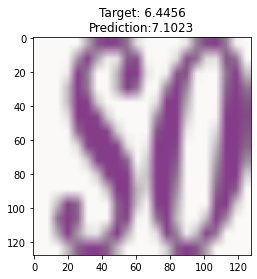

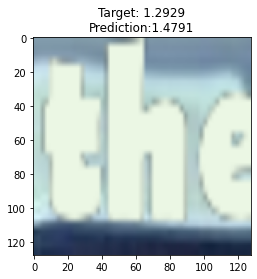

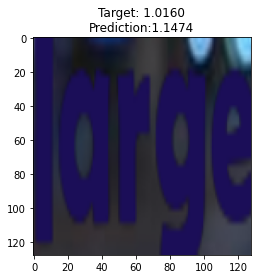

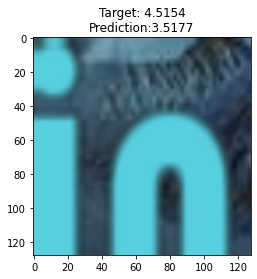

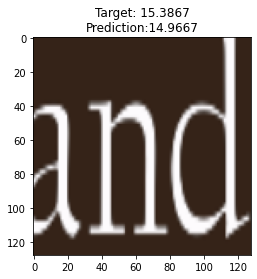

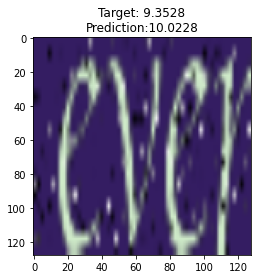

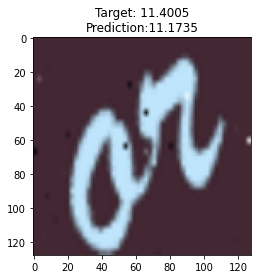

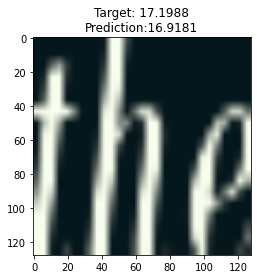

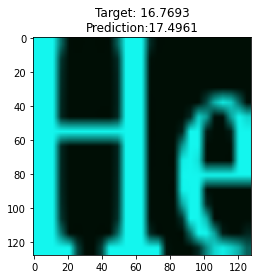

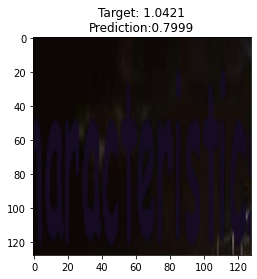

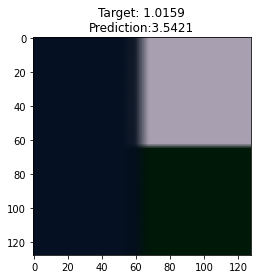

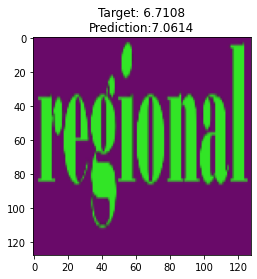

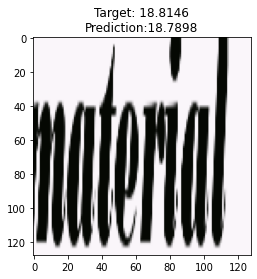

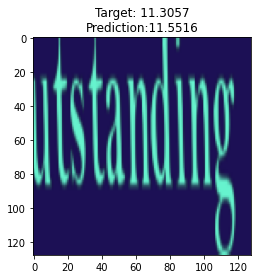

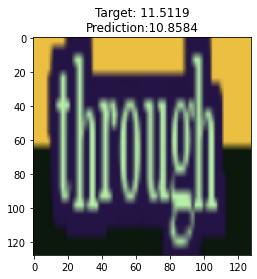

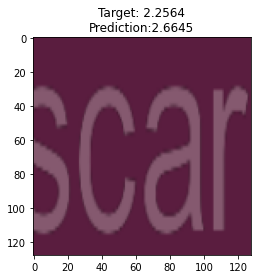

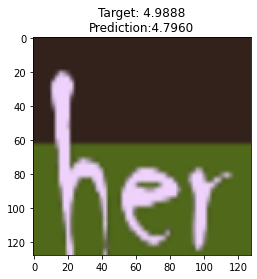

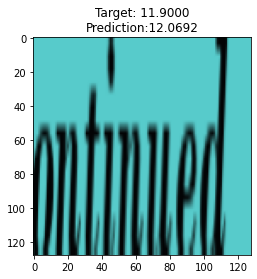

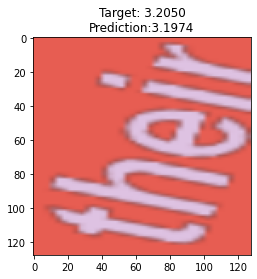

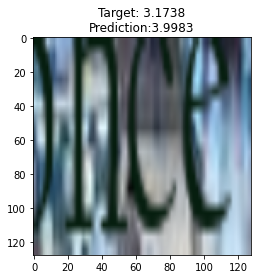

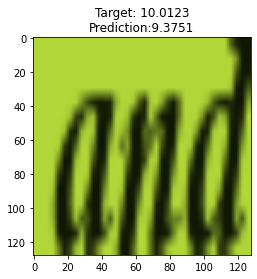

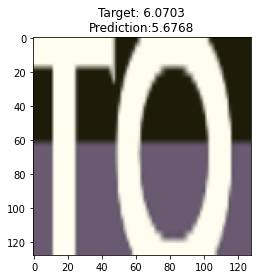

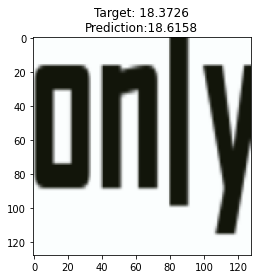

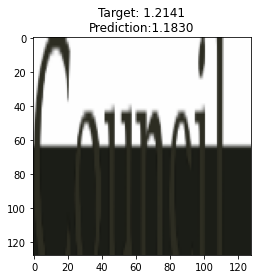

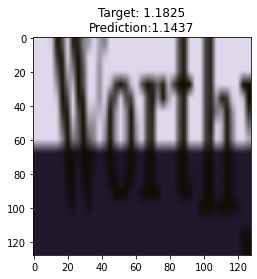

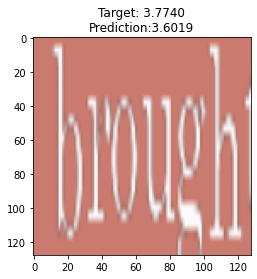

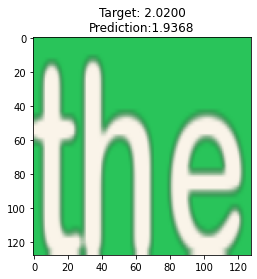

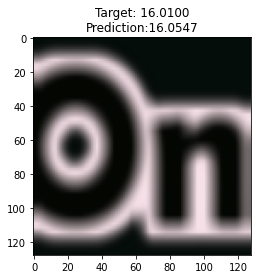

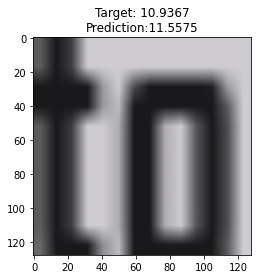

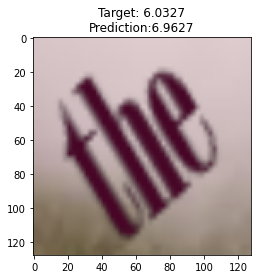

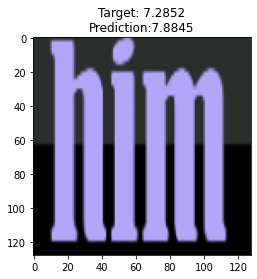

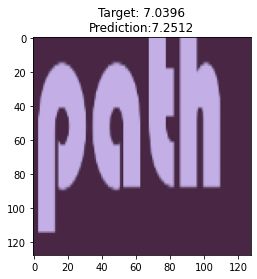

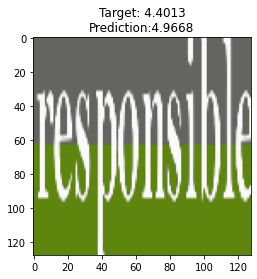

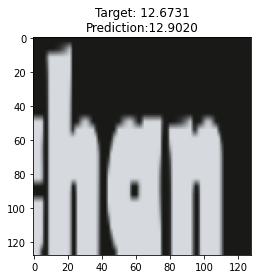

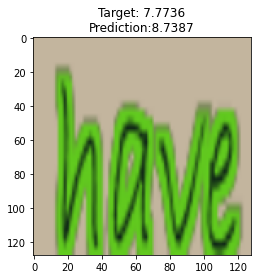

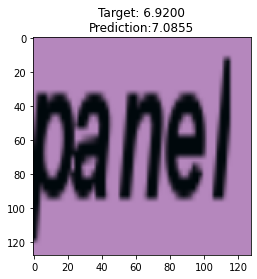

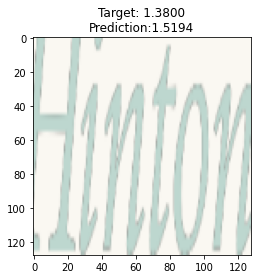

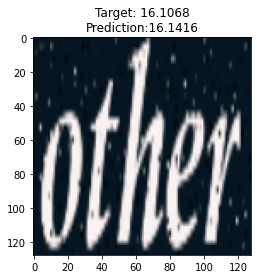

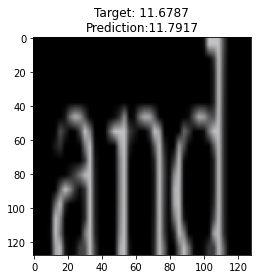

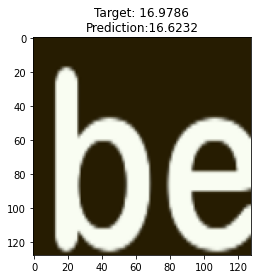

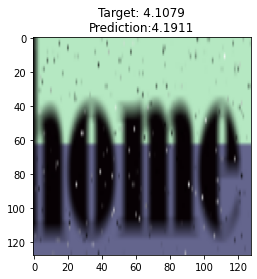

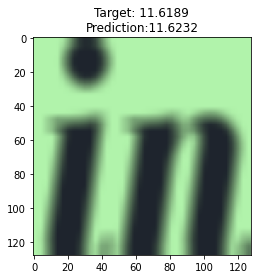

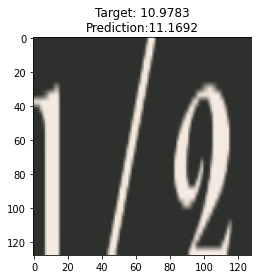

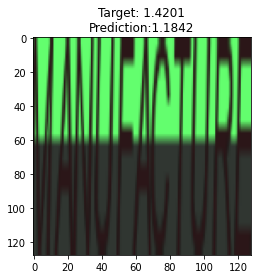

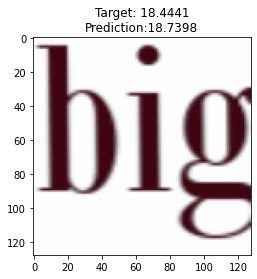

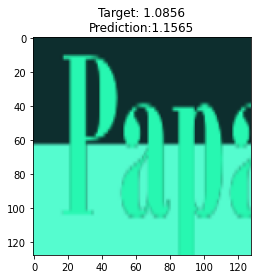

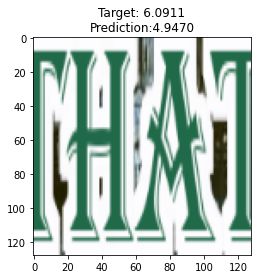

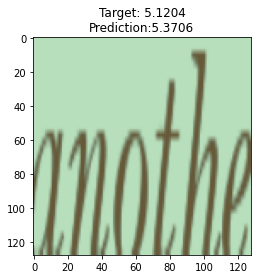

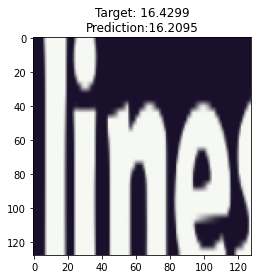

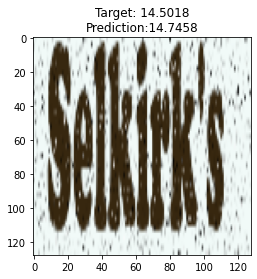

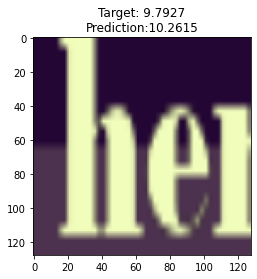

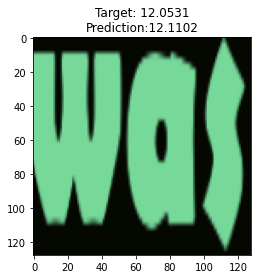

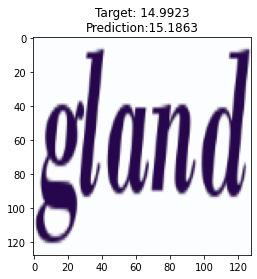

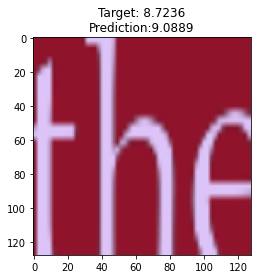

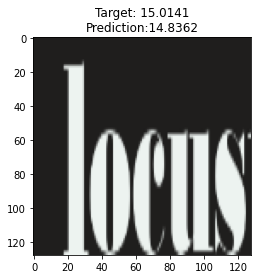

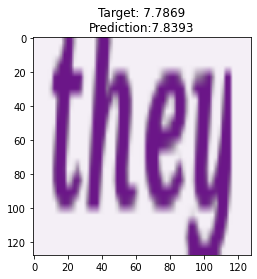

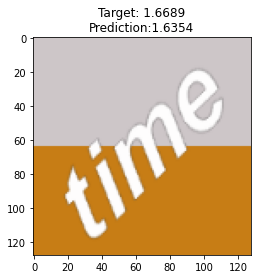

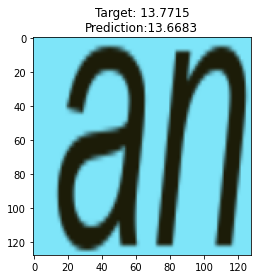

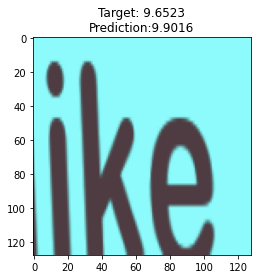

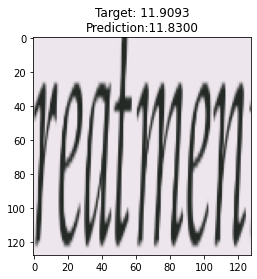

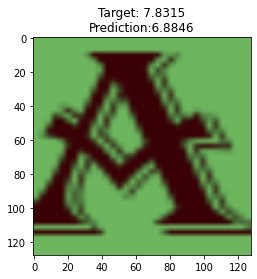

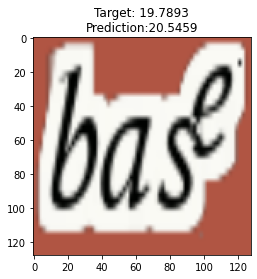

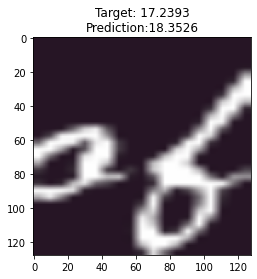

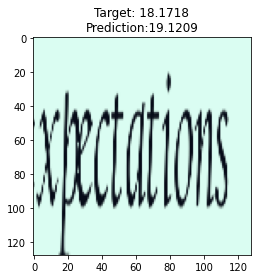

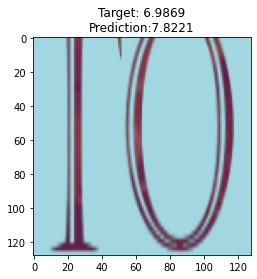

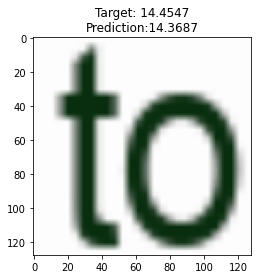

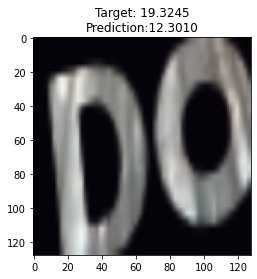

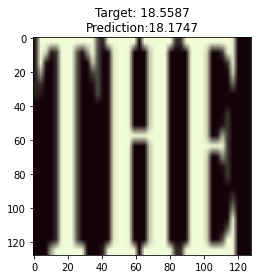

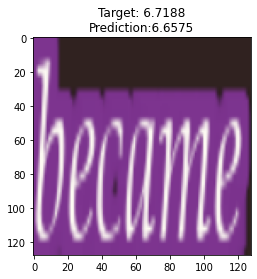

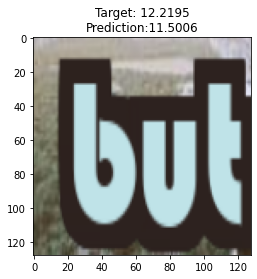

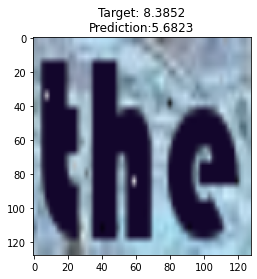

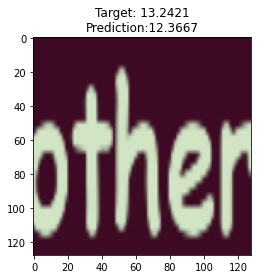

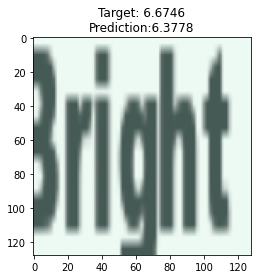

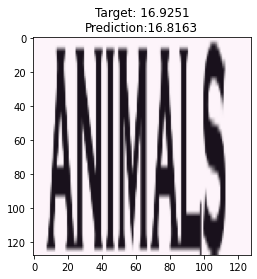

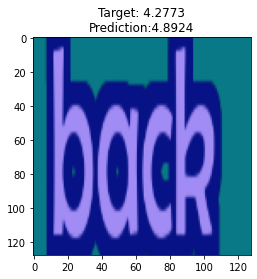

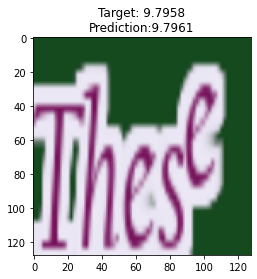

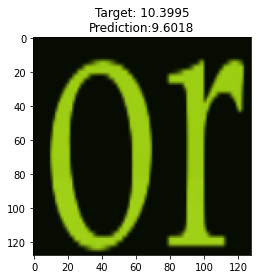

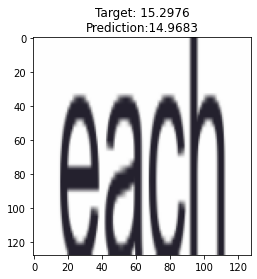

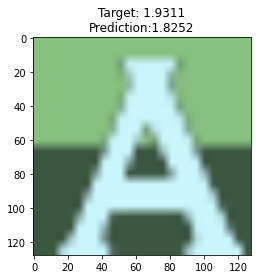

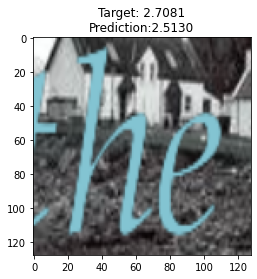

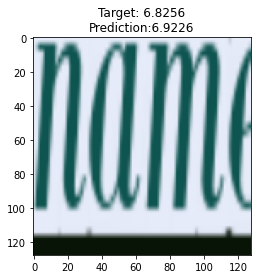

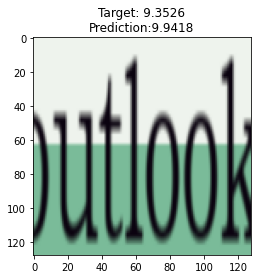

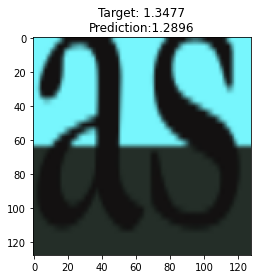

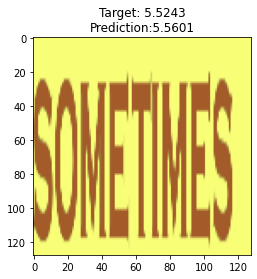

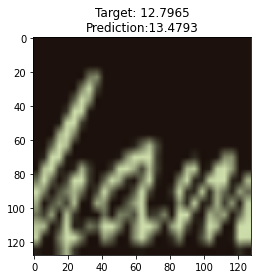

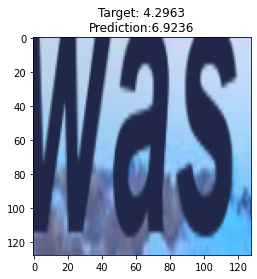

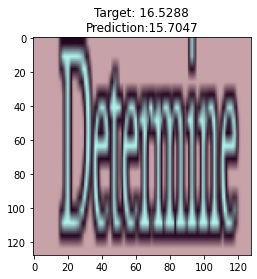

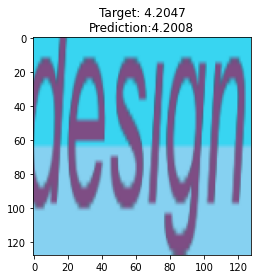

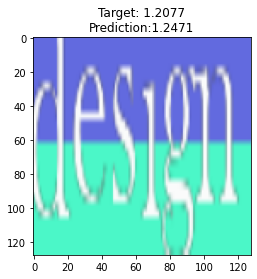

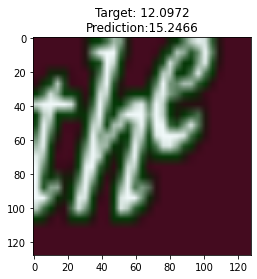

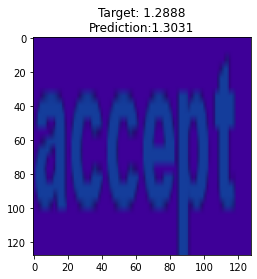

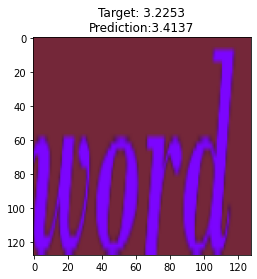

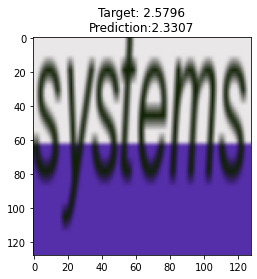

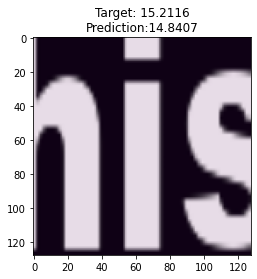

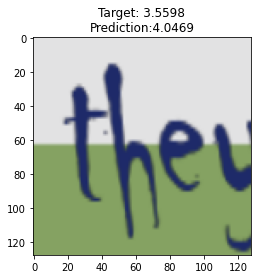

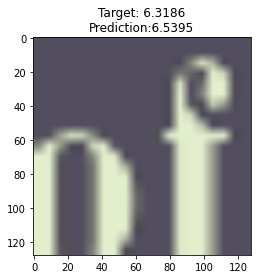

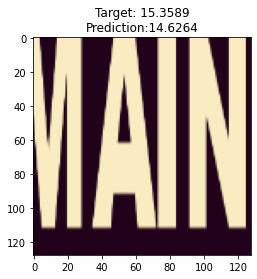

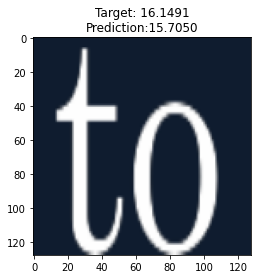

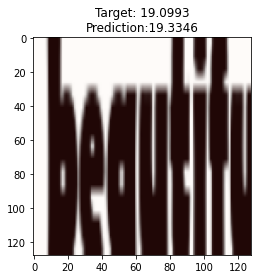

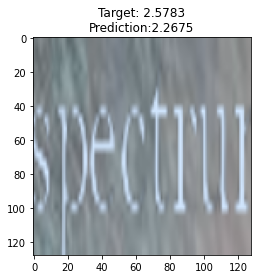

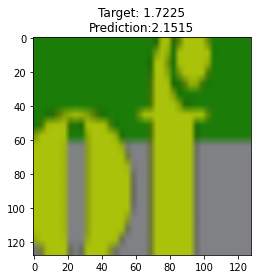

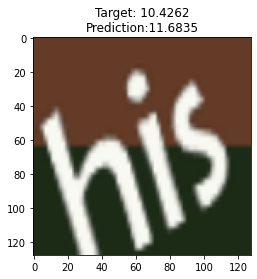

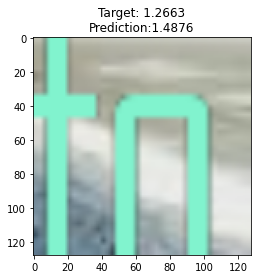

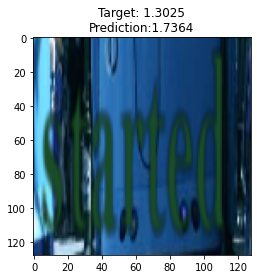

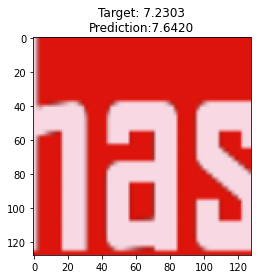

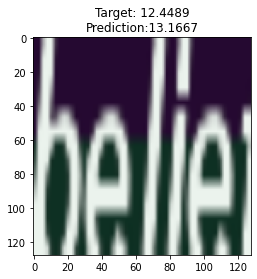

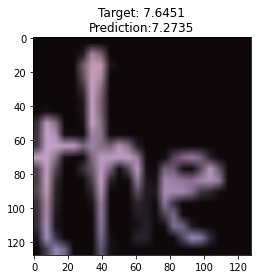

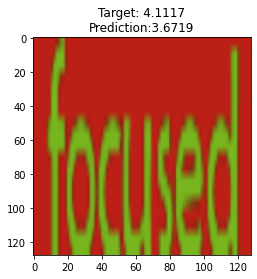

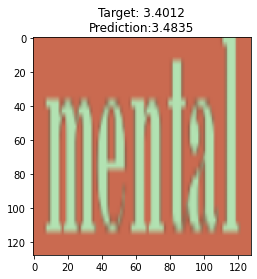

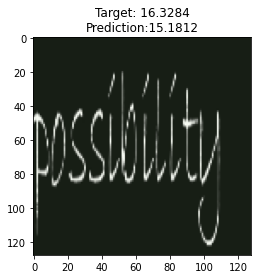

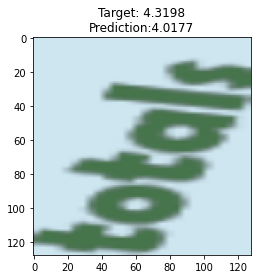

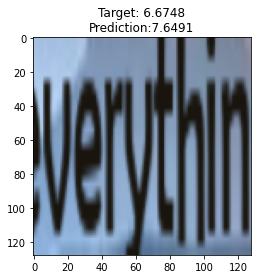

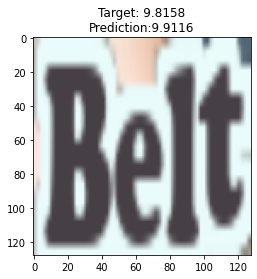

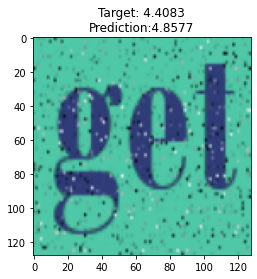

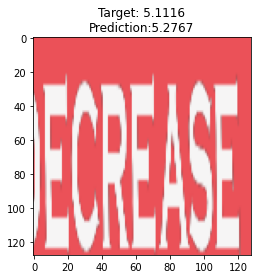

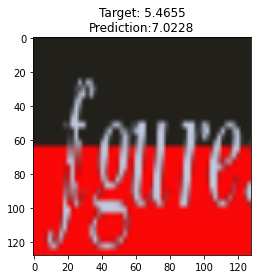

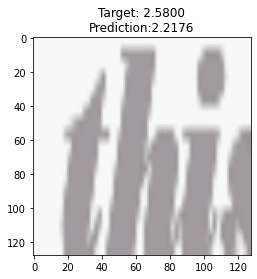

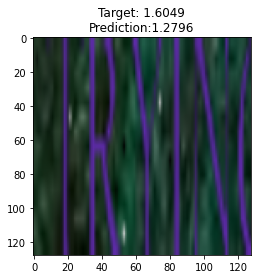

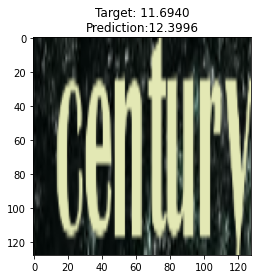

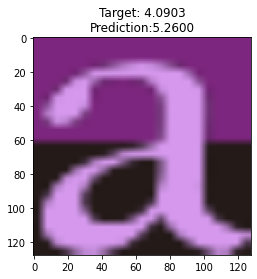

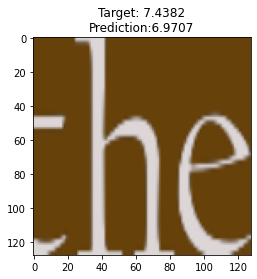

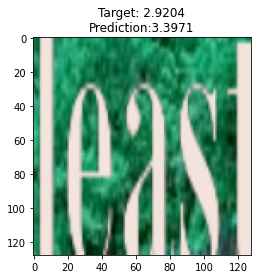

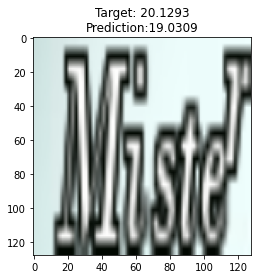

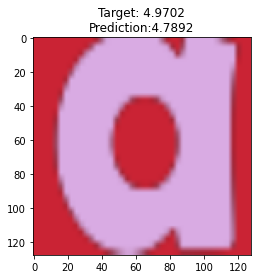

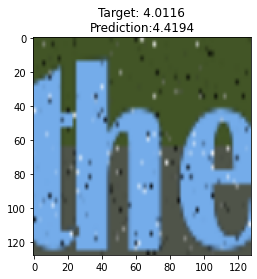

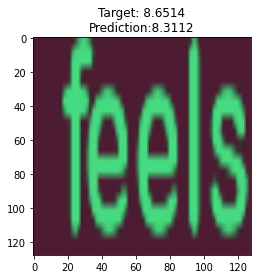

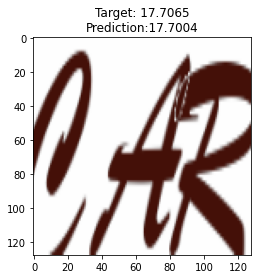

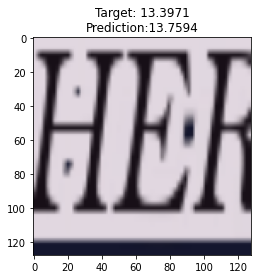

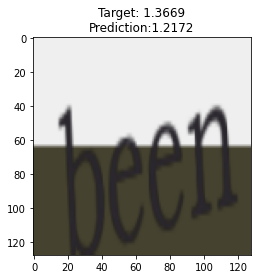

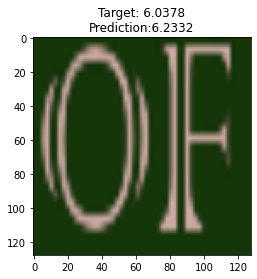

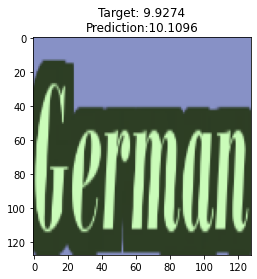

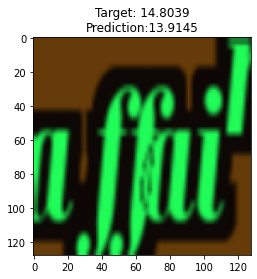

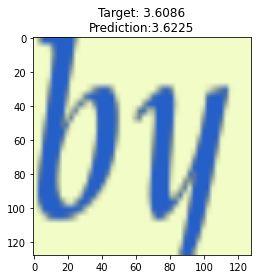

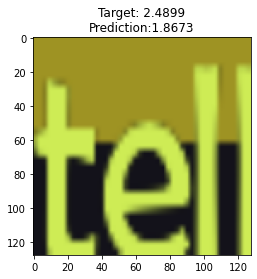

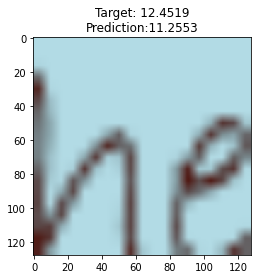

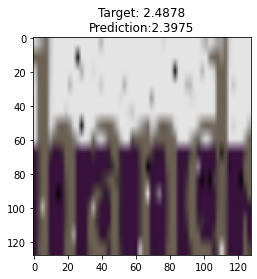

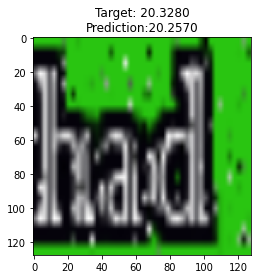

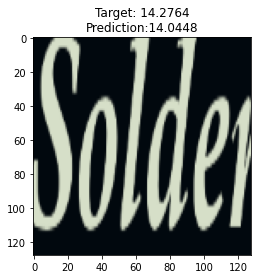

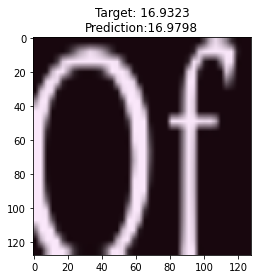

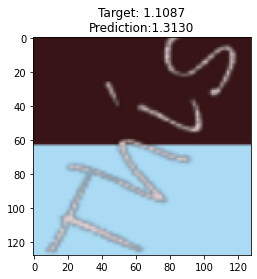

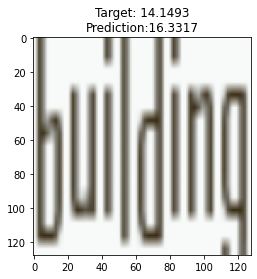

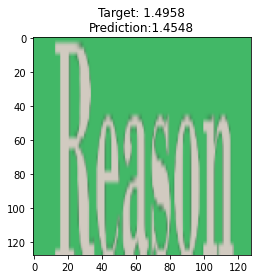

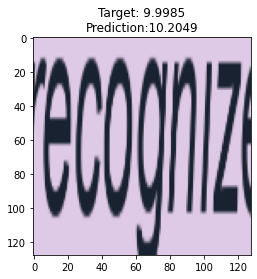

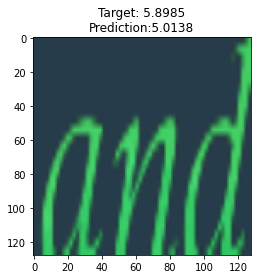

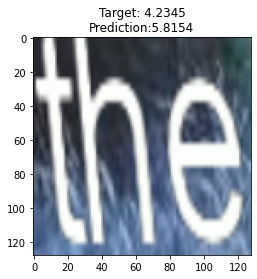

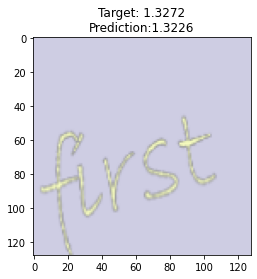

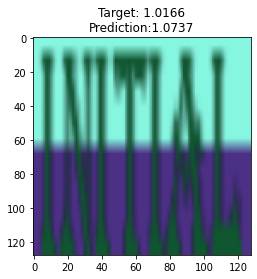

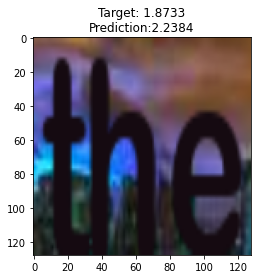

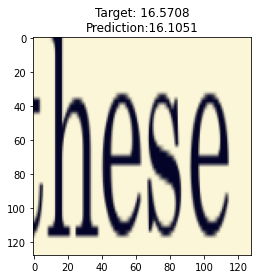

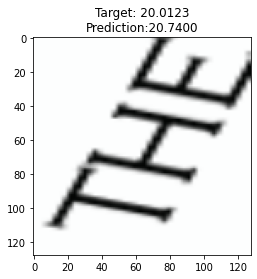

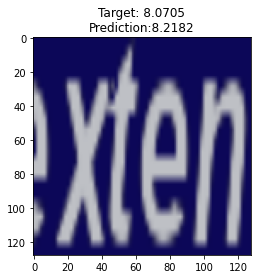

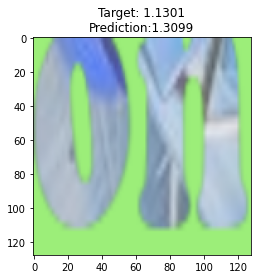

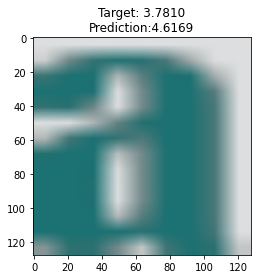

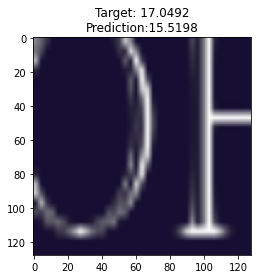

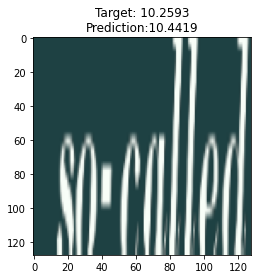

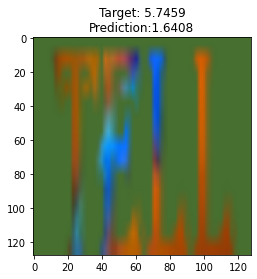

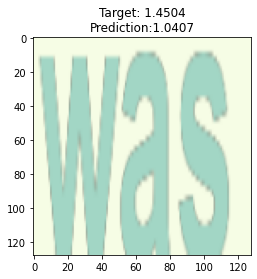

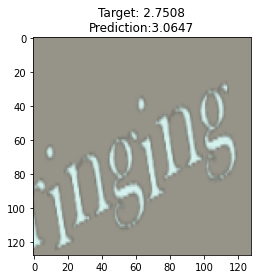

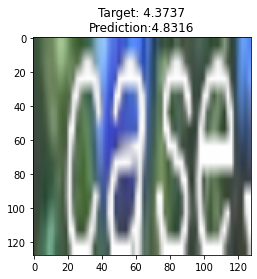

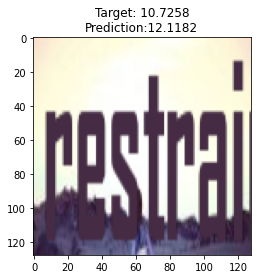

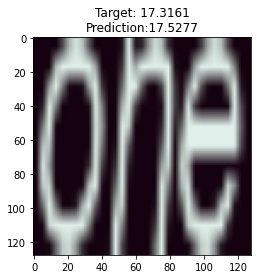

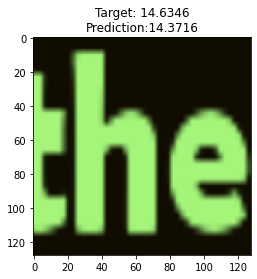

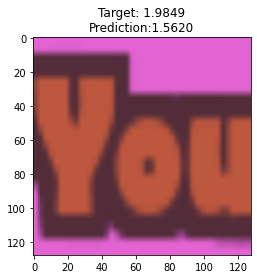

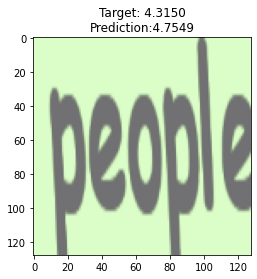

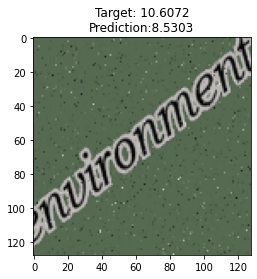

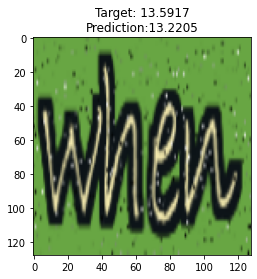

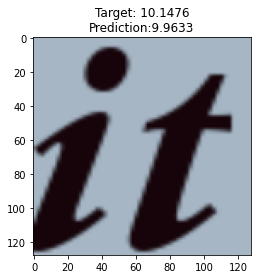

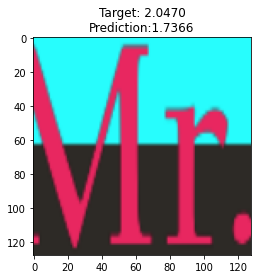

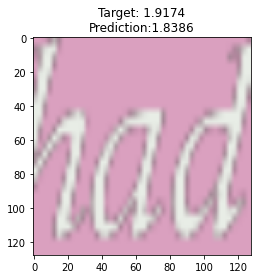

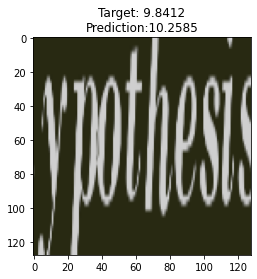

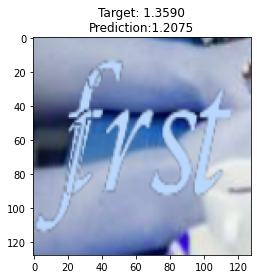

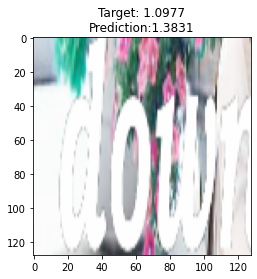

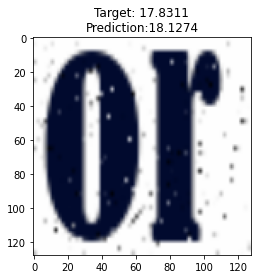

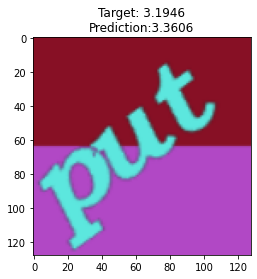

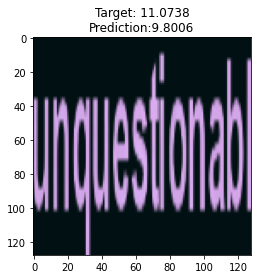

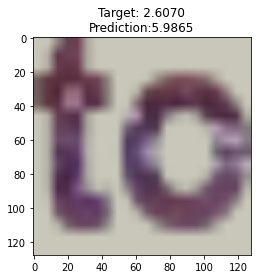

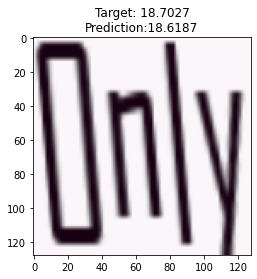

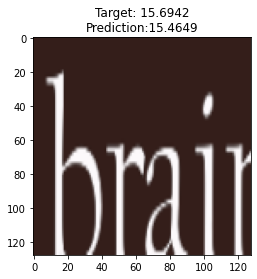

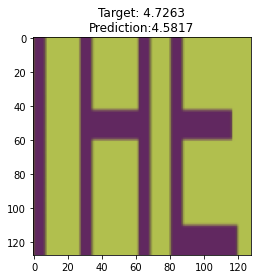

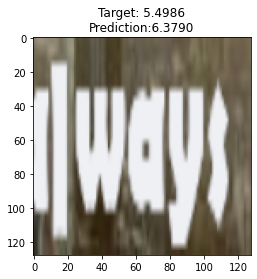

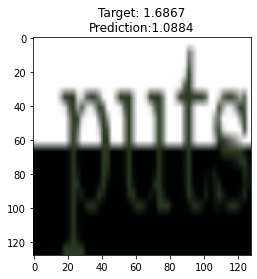

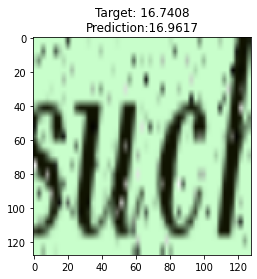

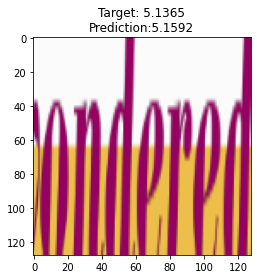

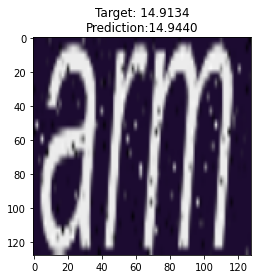

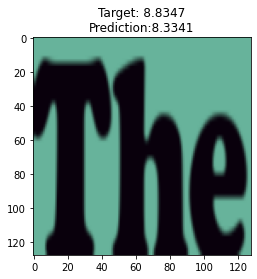

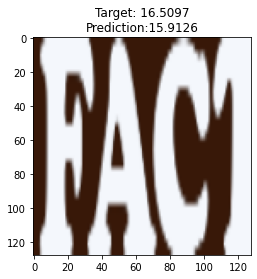

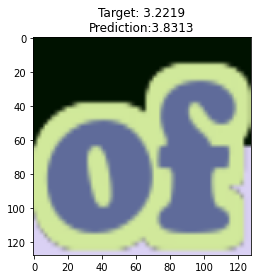

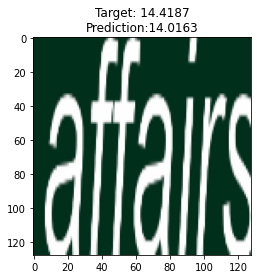

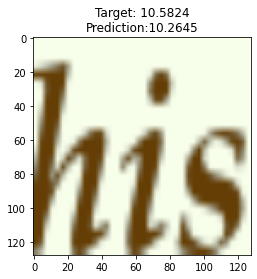

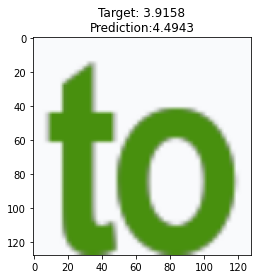

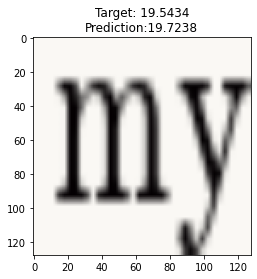

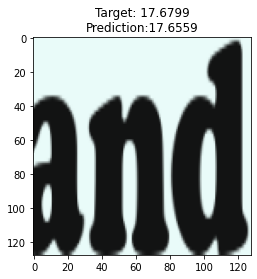

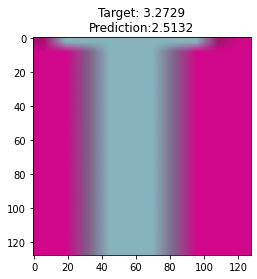

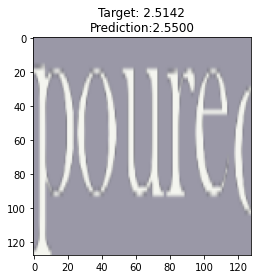

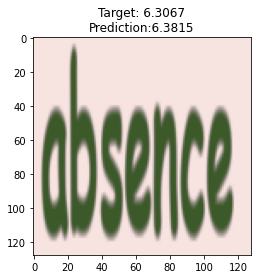

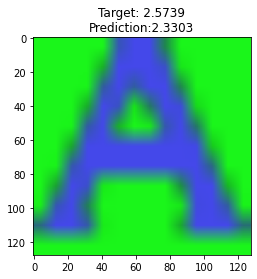

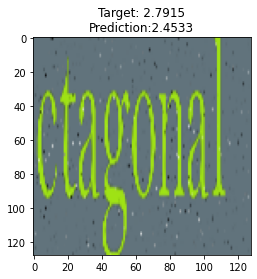

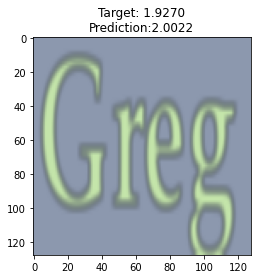

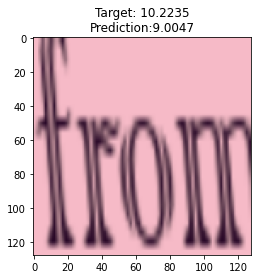

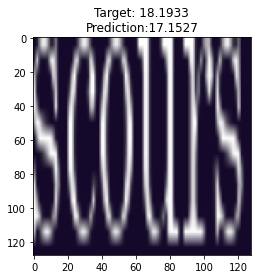

In [67]:
for img, target in zip(data.X_test[:200], data.y_test[:200]):
    pred = model.predict(np.array([resnet50.preprocess_input(img)]))[0][0]
    plt.title(f"Target: {target:.4f}\nPrediction:{pred:.4f}")
    plt.imshow(img)
    plt.show()
    